In [12]:
from PIL import Image,ImageFilter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

In [13]:
path='pic'

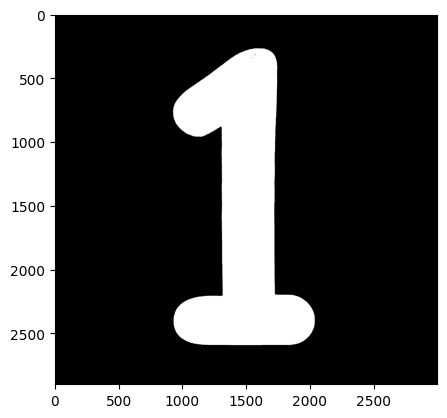

In [69]:
img = Image.open(path+'/1.jpg').convert('L')
#img 2-value
img_np=np.array(img,dtype=np.uint8)
#show
_,bimg=cv2.threshold(img_np, 128, 255, cv2.THRESH_BINARY_INV)
plt.imshow(bimg,cmap='gray')

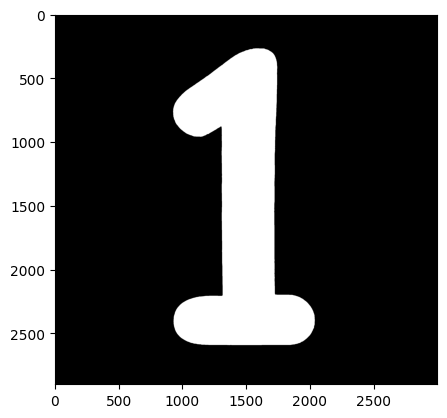

In [70]:
contours, hierarchy = cv2.findContours(bimg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#show the contour
new_img=np.zeros_like(np.array(img))
cv2.drawContours(new_img, contours, -1, (255), thickness=cv2.FILLED)
plt.imshow(new_img,cmap='gray')

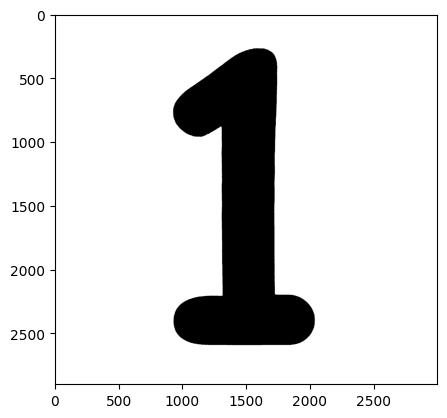

In [71]:
rev_img=cv2.bitwise_not(new_img)
plt.imshow(rev_img,cmap='gray')

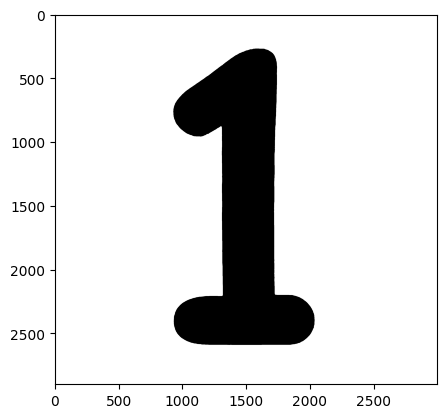

In [75]:
rgba_img=cv2.cvtColor(rev_img,cv2.COLOR_GRAY2RGBA)
rgba_img[np.all(rgba_img[:,:,:3]==[255,255,255],axis=-1)]=[255,255,255,0]
plt.imshow(rgba_img)

In [76]:
#save the image
new_path='pic1'
cv2.imwrite(new_path+'/1.png',rgba_img)

True

In [80]:
#packed all the code to function, input is the image name
def img2rgba(img_name):
    p=path+'/'+img_name
    img = Image.open(p).convert('L')
    #img 2-value
    img_np=np.array(img,dtype=np.uint8)
    #show
    _,bimg=cv2.threshold(img_np, 128, 255, cv2.THRESH_BINARY_INV)
    contours, hierarchy = cv2.findContours(bimg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    #show the contour
    new_img=np.zeros_like(np.array(img))
    cv2.drawContours(new_img, contours, -1, (255), thickness=cv2.FILLED)
    rev_img=cv2.bitwise_not(new_img)
    rgba_img=cv2.cvtColor(rev_img,cv2.COLOR_GRAY2RGBA)
    rgba_img[np.all(rgba_img[:,:,:3]==[255,255,255],axis=-1)]=[255,255,255,0]
    cv2.imwrite(new_path+'/'+img_name.split('.')[0]+'.png',rgba_img)

In [78]:
img2rgba('2.jpg')

In [81]:
for i in range(1,31):
    img2rgba(str(i)+'.jpg')